<a href="https://colab.research.google.com/github/Raoina/Spectra-2-Image/blob/main/notebooks/processing_dataset/LUCAS_Soil_Data_Prep_and_KS_Test_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Summary

This notebook performs the initial data loading, cleaning, and splitting of the LUCAS soil dataset.

Here's a summary of the steps:

1.  **Mount Google Drive**: Connects the notebook to your Google Drive to access the dataset file.
2.  **Load and Display Data**: Reads the `LUCAS.SOIL_corr.csv` file into a pandas DataFrame and shows the first few rows. It also handles potential file not found errors.
3.  **Select Relevant Columns**: Creates a new DataFrame with a subset of columns, including `sample.ID`, spectral data (`spc.`), and target variables (`clay`, `sand`, `pH.in.H2O`, `OC`, `N`, `CEC`).
4.  **Check Data Shape**: Prints the number of rows and columns in the selected DataFrame.
5.  **Check for Missing Values**: Identifies and prints the count of null or NaN values in each column.
6.  **Handle Missing Values**: Removes rows containing missing values from the DataFrame.
7.  **Check for Duplicate Sample IDs**: Counts and prints the number of duplicate values in the `sample.ID` column.
8.  **Display Duplicate Sample ID Counts**: Shows the count for each `sample.ID` that appears more than once.
9.  **Remove Duplicate Sample IDs**: Removes rows with duplicate `sample.ID` values, keeping the first occurrence.
10. **Split Data into Spectra and Target DataFrames**: Separates the spectral data and target variables into two distinct DataFrames based on column names.
11. **Visualize Spectral Data Distributions**: Creates histograms to show the distribution of selected spectral columns.
12. **Perform KS Test on Initial Subsets**: Compares the distributions of selected spectral and target variables between the first 10000 rows and the next 7000 rows using the Kolmogorov-Smirnov test.
13. **Split Data into Training and Testing Sets (45% test)**: Splits the full dataset into training and testing sets with 45% of the data allocated for testing.
14. **Perform KS Test on Initial Train/Test Split**: Compares the distributions of selected spectral variables between the initial training and testing sets.
15. **Split Data into Training and Testing Sets (22% test)**: Splits the full dataset into new training and testing sets with 22% of the data allocated for testing.
16. **Perform KS Test on New Train/Test Split**: Compares the distributions of selected spectral variables between the new training and testing sets.
17. **Split New Test Set (70/30)**: Further splits the `spectra_test_new` and `target_test_new` dataframes into two parts (70% and 30%).
18. **Split Original Test Set (1k/Rest)**: Splits the original `spectra_test` and `target_test` dataframes to create a 1000-row set and a remaining set.
19. **Save Split DataFrames**: Saves the various split training and testing DataFrames to CSV files in a specified Google Drive folder.
20. **Save Full Spectra and Target DataFrames**: Saves the complete `spectra_17k` and `target_17k` dataframes to CSV files in the same Google Drive folder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/LUCAS.SOIL_corr.csv'

try:
  df = pd.read_csv(file_path)
  display(df.head())
except FileNotFoundError:
  print(f"Error: The file '{file_path}' was not found. Please check the path.")
except Exception as e:
  print(f"An error occurred: {e}")

/tmp/ipython-input-3733348717.py:6: DtypeWarning: Columns (1,2,4216,4231,4234,4237,4274) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Unnamed: 0,sample.ID,ID,date,spc.400,spc.400.5,spc.401,spc.401.5,spc.402,spc.402.5,...,WRBLV1,WRBADJ1,PARMADO1,PARMADO2,PARMADO3,PARMASE1,PARMASE2,PARMASE3,MIN_TOP,mineral
0,4,100,100,2011-01-24 16:02:25,0.831705,0.839111,0.846473,0.853773,0.860988,0.868098,...,CM,dy,3.0,31.0,310.0,5.0,56.0,561.0,KQ,mineral
1,5,1000,1000,2010-09-30 14:50:01,0.706027,0.714901,0.723727,0.732480,0.741142,0.749684,...,CM,dy,3.0,31.0,311.0,3.0,31.0,310.0,KQ,mineral
2,6,10000,10000,2010-10-19 12:06:16,0.666238,0.676472,0.686654,0.696757,0.706753,0.716615,...,CM,ca,2.0,21.0,214.0,0.0,0.0,0.0,MS,mineral
3,7,10001,10001,2010-10-19 15:00:01,0.698136,0.706548,0.714909,0.723197,0.731384,0.739448,...,CM,dy,3.0,31.0,310.0,4.0,42.0,420.0,KQ,mineral
4,8,10002,10002,2011-04-30 12:26:27,0.675433,0.684820,0.694163,0.703438,0.712620,0.721693,...,LV,ha,7.0,71.0,710.0,6.0,62.0,620.0,M,mineral


In [ ]:
selected_cols = ['sample.ID'] + [f'spc.{i}' for i in range(400, 2500)] + [f'spc.{i}.5' for i in range(400, 2500)] + ['clay', 'sand', 'pH.in.H2O', 'OC', 'N', 'CEC']

# Filter out columns not present in df
selected_cols_present = [col for col in selected_cols if col in df.columns]

new_df_selected = df[selected_cols_present].copy()

display(new_df_selected.head())

,sample.ID,spc.400,spc.401,spc.402,spc.403,spc.404,spc.405,spc.406,spc.407,spc.408,...,spc.2496.5,spc.2497.5,spc.2498.5,spc.2499.5,clay,sand,pH.in.H2O,OC,N,CEC
0,100,0.831705,0.846473,0.860988,0.875088,0.888626,0.901469,0.913506,0.924636,0.934798,...,0.552333,0.552346,0.552338,0.552314,7.0,48.0,4.00,91.1,5.3,7.2
1,1000,0.706027,0.723727,0.741142,0.758085,0.774371,0.789831,0.804314,0.817703,0.829923,...,0.424742,0.424924,0.425088,0.425256,13.0,60.0,6.53,21.4,2.1,13.0
2,10000,0.666238,0.686654,0.706753,0.726321,0.745154,0.763069,0.779905,0.795543,0.809902,...,0.426931,0.427254,0.427561,0.427900,40.0,8.0,7.14,15.6,1.4,24.6
3,10001,0.698136,0.714909,0.731384,0.747365,0.762668,0.777130,0.790616,0.803027,0.814308,...,0.594653,0.595211,0.595749,0.596341,26.0,56.0,4.83,19.8,1.6,20.6
4,10002,0.675433,0.694163,0.712620,0.730629,0.748003,0.764583,0.780215,0.794766,0.808142,...,0.401380,0.401554,0.401720,0.401902,22.0,37.0,5.74,33.5,2.6,15.0


In [ ]:
print(new_df_selected.shape)

(19036, 4207)


In [ ]:
null_counts = new_df_selected.isnull().sum()
print("Null or NaN values per column:")
print(null_counts[null_counts > 0]) # Display only columns with null values

Null or NaN values per column:
clay    1097
sand    1097
dtype: int64


In [ ]:
new_df_cleaned = new_df_selected.dropna()

print("Shape of the DataFrame after dropping rows with null values:")
print(new_df_cleaned.shape)

Shape of the DataFrame after dropping rows with null values:
(17939, 4207)


In [ ]:
duplicate_sample_ids = new_df_cleaned['sample.ID'].duplicated().sum()
print(f"Number of duplicate values in the 'sample.ID' column: {duplicate_sample_ids}")

Number of duplicate values in the 'sample.ID' column: 23


In [ ]:
duplicate_counts = new_df_cleaned['sample.ID'].value_counts()
print("Count of each duplicate 'sample.ID' value:")
print(duplicate_counts[duplicate_counts > 1])

Count of each duplicate 'sample.ID' value:
sample.ID
777        2
16985      2
12610      2
20898      2
3542       2
4233       2
18844      2
4942       2
13955      2
15817      2
8462       2
8969       2
22019UK    2
17799      2
15165      2
16839      2
131        2
3125       2
15506      2
19577      2
5395       2
6708       2
565        2
Name: count, dtype: int64


In [ ]:
new_df_unique_sample_id = new_df_cleaned.drop_duplicates(subset=['sample.ID'])

print("Shape of the DataFrame after dropping rows with duplicate 'sample.ID':")
print(new_df_unique_sample_id.shape)

Shape of the DataFrame after dropping rows with duplicate 'sample.ID':
(17916, 4207)


In [ ]:
new_df_unique_sample_id.head()

,sample.ID,spc.400,spc.401,spc.402,spc.403,spc.404,spc.405,spc.406,spc.407,spc.408,...,spc.2496.5,spc.2497.5,spc.2498.5,spc.2499.5,clay,sand,pH.in.H2O,OC,N,CEC
0,100,0.831705,0.846473,0.860988,0.875088,0.888626,0.901469,0.913506,0.924636,0.934798,...,0.552333,0.552346,0.552338,0.552314,7.0,48.0,4.00,91.1,5.3,7.2
1,1000,0.706027,0.723727,0.741142,0.758085,0.774371,0.789831,0.804314,0.817703,0.829923,...,0.424742,0.424924,0.425088,0.425256,13.0,60.0,6.53,21.4,2.1,13.0
2,10000,0.666238,0.686654,0.706753,0.726321,0.745154,0.763069,0.779905,0.795543,0.809902,...,0.426931,0.427254,0.427561,0.427900,40.0,8.0,7.14,15.6,1.4,24.6
3,10001,0.698136,0.714909,0.731384,0.747365,0.762668,0.777130,0.790616,0.803027,0.814308,...,0.594653,0.595211,0.595749,0.596341,26.0,56.0,4.83,19.8,1.6,20.6
4,10002,0.675433,0.694163,0.712620,0.730629,0.748003,0.764583,0.780215,0.794766,0.808142,...,0.401380,0.401554,0.401720,0.401902,22.0,37.0,5.74,33.5,2.6,15.0


In [ ]:
# Define the columns for spectra and target DataFrames
spectra_cols = ['sample.ID'] + [col for col in new_df_unique_sample_id.columns if col.startswith('spc.')]
target_cols = ['sample.ID', 'clay', 'sand', 'pH.in.H2O', 'OC', 'N', 'CEC']

# Create the spectra_17k DataFrame
spectra_17k = new_df_unique_sample_id[spectra_cols].copy()

# Create the target_17k DataFrame
target_17k = new_df_unique_sample_id[target_cols].copy()

print("Shape of spectra_17k:", spectra_17k.shape)
print("Shape of target_17k:", target_17k.shape)

display(spectra_17k.head())
display(target_17k.head())

Shape of spectra_17k: (17916, 4201)
Shape of target_17k: (17916, 7)


,sample.ID,spc.400,spc.401,spc.402,spc.403,spc.404,spc.405,spc.406,spc.407,spc.408,...,spc.2490.5,spc.2491.5,spc.2492.5,spc.2493.5,spc.2494.5,spc.2495.5,spc.2496.5,spc.2497.5,spc.2498.5,spc.2499.5
0,100,0.831705,0.846473,0.860988,0.875088,0.888626,0.901469,0.913506,0.924636,0.934798,...,0.552014,0.552099,0.552163,0.552214,0.552261,0.552303,0.552333,0.552346,0.552338,0.552314
1,1000,0.706027,0.723727,0.741142,0.758085,0.774371,0.789831,0.804314,0.817703,0.829923,...,0.423196,0.423503,0.423789,0.424058,0.424308,0.424536,0.424742,0.424924,0.425088,0.425256
2,10000,0.666238,0.686654,0.706753,0.726321,0.745154,0.763069,0.779905,0.795543,0.809902,...,0.424621,0.425053,0.425461,0.425853,0.426230,0.426590,0.426931,0.427254,0.427561,0.427900
3,10001,0.698136,0.714909,0.731384,0.747365,0.762668,0.777130,0.790616,0.803027,0.814308,...,0.590850,0.591535,0.592203,0.592851,0.593476,0.594077,0.594653,0.595211,0.595749,0.596341
4,10002,0.675433,0.694163,0.712620,0.730629,0.748003,0.764583,0.780215,0.794766,0.808142,...,0.399946,0.400250,0.400523,0.400769,0.400992,0.401195,0.401380,0.401554,0.401720,0.401902


,sample.ID,clay,sand,pH.in.H2O,OC,N,CEC
0,100,7.0,48.0,4.00,91.1,5.3,7.2
1,1000,13.0,60.0,6.53,21.4,2.1,13.0
2,10000,40.0,8.0,7.14,15.6,1.4,24.6
3,10001,26.0,56.0,4.83,19.8,1.6,20.6
4,10002,22.0,37.0,5.74,33.5,2.6,15.0


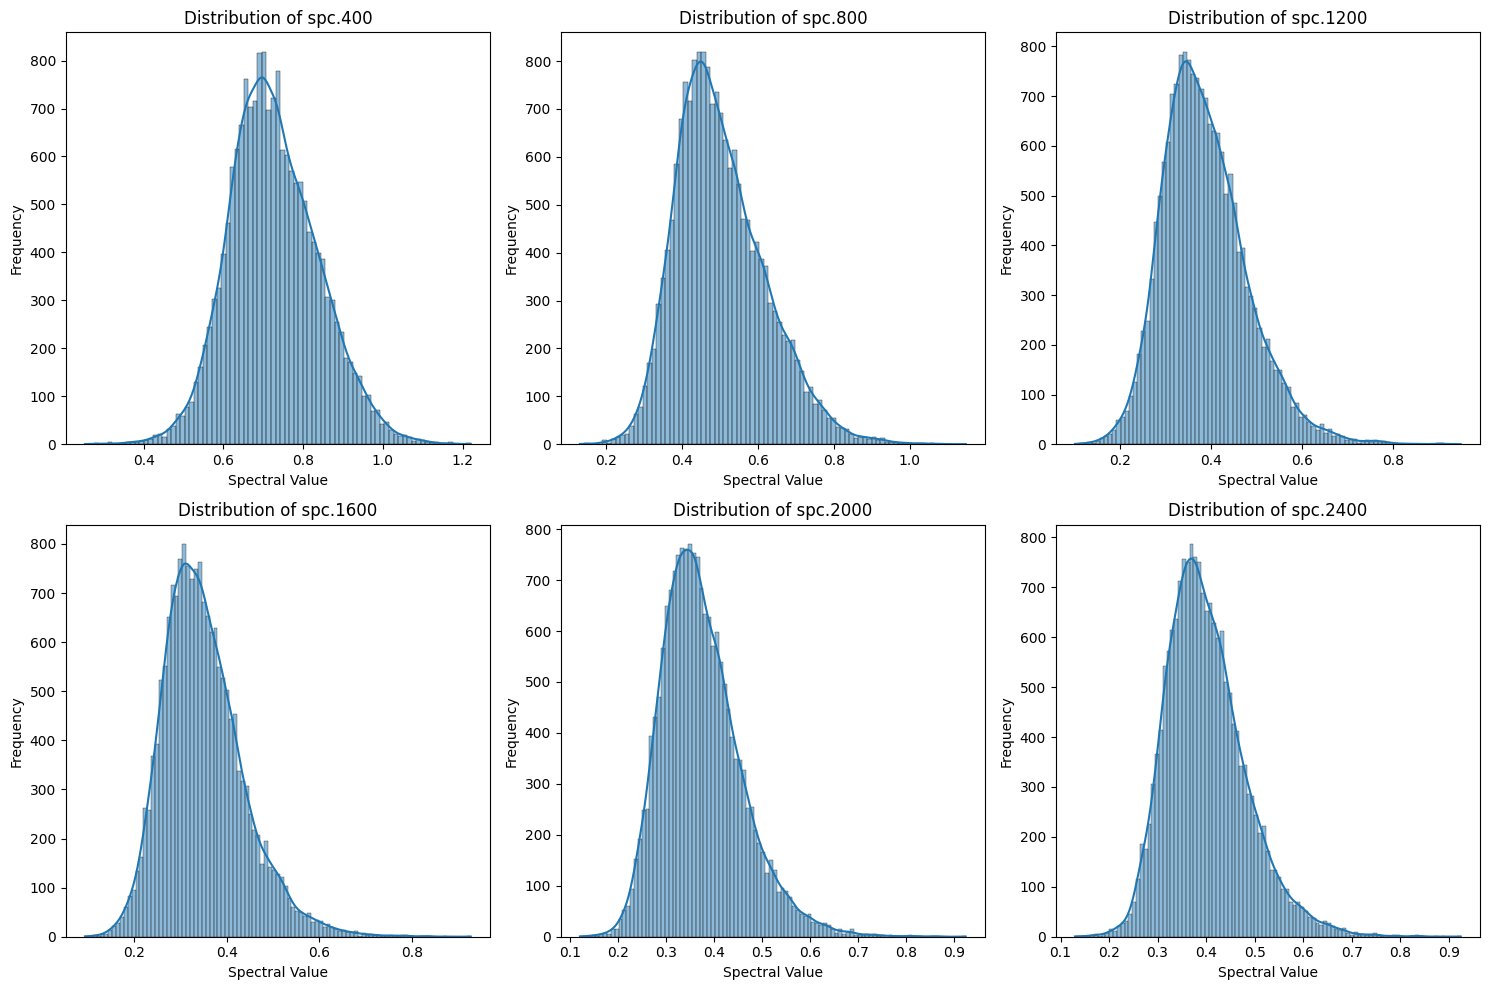

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few representative spectral columns for visualization
# You can change the column names in the list below to visualize different spectra
spectral_columns_to_plot = ['spc.400', 'spc.800', 'spc.1200', 'spc.1600', 'spc.2000', 'spc.2400']

# Ensure the selected columns exist in the DataFrame
existing_spectral_columns = [col for col in spectral_columns_to_plot if col in spectra_17k.columns]

if not existing_spectral_columns:
    print("None of the selected spectral columns exist in spectra_17k.")
else:
    # Create histograms for the selected spectral columns
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(existing_spectral_columns):
        plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
        sns.histplot(spectra_17k[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Spectral Value')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [ ]:
from scipy.stats import ks_2samp

# Define the two subsets of rows
subset_10k = spectra_17k.iloc[:10000]
subset_7k = spectra_17k.iloc[10000:17000] # Taking the next 7000 rows

# Define the spectral columns to test
spectral_columns_to_test = ['spc.400', 'spc.800', 'spc.1200', 'spc.1600', 'spc.2000', 'spc.2400']

print("Performing Kolmogorov-Smirnov (KS) test between the first 10000 rows and the next 7000 rows:")

# Perform KS test for each specified spectral column
for col in spectral_columns_to_test:
    if col in subset_10k.columns and col in subset_7k.columns:
        stat, p_value = ks_2samp(subset_10k[col], subset_7k[col])
        print(f"Column: {col}")
        print(f"  KS Statistic: {stat:.4f}")
        print(f"  P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("  Interpretation: The distributions are statistically significantly different (reject null hypothesis).")
        else:
            print("  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).")
    else:
        print(f"Column: {col} - Not found in both subsets.")

Performing Kolmogorov-Smirnov (KS) test between the first 10000 rows and the next 7000 rows:
Column: spc.400
  KS Statistic: 0.0870
  P-value: 0.0000
  Interpretation: The distributions are statistically significantly different (reject null hypothesis).
Column: spc.800
  KS Statistic: 0.0894
  P-value: 0.0000
  Interpretation: The distributions are statistically significantly different (reject null hypothesis).
Column: spc.1200
  KS Statistic: 0.0920
  P-value: 0.0000
  Interpretation: The distributions are statistically significantly different (reject null hypothesis).
Column: spc.1600
  KS Statistic: 0.0842
  P-value: 0.0000
  Interpretation: The distributions are statistically significantly different (reject null hypothesis).
Column: spc.2000
  KS Statistic: 0.0509
  P-value: 0.0000
  Interpretation: The distributions are statistically significantly different (reject null hypothesis).
Column: spc.2400
  KS Statistic: 0.0379
  P-value: 0.0000
  Interpretation: The distributions are s

In [ ]:
from scipy.stats import ks_2samp

# Define the two subsets of rows using the same indices as before for consistency
subset_10k_target = target_17k.iloc[:10000]
subset_7k_target = target_17k.iloc[10000:17000] # Taking the next 7000 rows

# Define the target columns to test (excluding 'sample.ID')
target_columns_to_test = ['clay', 'sand', 'pH.in.H2O', 'OC', 'N', 'CEC']

print("Performing Kolmogorov-Smirnov (KS) test between the first 10000 rows and the next 7000 rows for target variables:")

# Perform KS test for each specified target column
for col in target_columns_to_test:
    if col in subset_10k_target.columns and col in subset_7k_target.columns:
        # Ensure data is numeric and handle potential NaNs if any (though we dropped NaNs earlier)
        data_subset_10k = subset_10k_target[col].dropna()
        data_subset_7k = subset_7k_target[col].dropna()

        if len(data_subset_10k) > 0 and len(data_subset_7k) > 0:
            stat, p_value = ks_2samp(data_subset_10k, data_subset_7k)
            print(f"Column: {col}")
            print(f"  KS Statistic: {stat:.4f}")
            print(f"  P-value: {p_value:.4f}")
            if p_value < 0.05:
                print("  Interpretation: The distributions are statistically significantly different (reject null hypothesis).")
            else:
                print("  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).")
        else:
            print(f"Column: {col} - Insufficient data in one or both subsets after dropping NaNs.")
    else:
        print(f"Column: {col} - Not found in both subsets.")

Performing Kolmogorov-Smirnov (KS) test between the first 10000 rows and the next 7000 rows for target variables:
Column: clay
  KS Statistic: 0.0784
  P-value: 0.0000
  Interpretation: The distributions are statistically significantly different (reject null hypothesis).
Column: sand
  KS Statistic: 0.0519
  P-value: 0.0000
  Interpretation: The distributions are statistically significantly different (reject null hypothesis).
Column: pH.in.H2O
  KS Statistic: 0.1136
  P-value: 0.0000
  Interpretation: The distributions are statistically significantly different (reject null hypothesis).
Column: OC
  KS Statistic: 0.0448
  P-value: 0.0000
  Interpretation: The distributions are statistically significantly different (reject null hypothesis).
Column: N
  KS Statistic: 0.0356
  P-value: 0.0001
  Interpretation: The distributions are statistically significantly different (reject null hypothesis).
Column: CEC
  KS Statistic: 0.0756
  P-value: 0.0000
  Interpretation: The distributions are sta

In [29]:
from sklearn.model_selection import train_test_split

# Ensure the 'sample.ID' column is used for splitting to keep corresponding rows
# However, train_test_split works directly on the data arrays/DataFrames
# We will split both dataframes based on their indices to ensure consistency

# Set a random state for reproducibility
random_state = 42

# Split the data into training and testing sets (e.g., 80% train, 20% test)
spectra_train, spectra_test, target_train, target_test = train_test_split(
    spectra_17k,
    target_17k,
    test_size=0.06,  # 45% for testing
    random_state=random_state,
    shuffle=True # Ensure shuffling
)

print("Shape of spectra_train:", spectra_train.shape)
print("Shape of spectra_test:", spectra_test.shape)
print("Shape of target_train:", target_train.shape)
print("Shape of target_test:", target_test.shape)


Shape of spectra_train: (16841, 4201)
Shape of spectra_test: (1075, 4201)
Shape of target_train: (16841, 7)
Shape of target_test: (1075, 7)


In [30]:
from scipy.stats import ks_2samp

# Define the spectral columns to test
spectral_columns_to_test = ['spc.400', 'spc.800', 'spc.1200', 'spc.1600', 'spc.2000', 'spc.2400']

print("Performing Kolmogorov-Smirnov (KS) test between the original test set and the new test set for spectral variables:")

# Perform KS test for each specified spectral column
for col in spectral_columns_to_test:
    if col in spectra_test.columns and col in spectra_test_new.columns:
        stat, p_value = ks_2samp(spectra_test[col], spectra_test_new[col])
        print(f"Column: {col}")
        print(f"  KS Statistic: {stat:.4f}")
        print(f"  P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("  Interpretation: The distributions are statistically significantly different (reject null hypothesis).")
        else:
            print("  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).")
    else:
        print(f"Column: {col} - Not found in both subsets.")

Performing Kolmogorov-Smirnov (KS) test between the original test set and the new test set for spectral variables:
Column: spc.400
  KS Statistic: 0.0157
  P-value: 0.9822
  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).
Column: spc.800
  KS Statistic: 0.0176
  P-value: 0.9498
  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).
Column: spc.1200
  KS Statistic: 0.0208
  P-value: 0.8460
  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).
Column: spc.1600
  KS Statistic: 0.0205
  P-value: 0.8587
  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).
Column: spc.2000
  KS Statistic: 0.0252
  P-value: 0.6412
  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).
Column: spc.2400


In [27]:
from sklearn.model_selection import train_test_split

# Ensure the 'sample.ID' column is used for splitting to keep corresponding rows
# However, train_test_split works directly on the data arrays/DataFrames
# We will split both dataframes based on their indices to ensure consistency

# Set a random state for reproducibility
random_state = 42

# Split the data into training and testing sets (e.g., 80% train, 20% test)
spectra_train_new, spectra_test_new, target_train_new, target_test_new = train_test_split(
    spectra_17k,
    target_17k,
    test_size=0.224,  # 22% for testing
    random_state=random_state,
    shuffle=True # Ensure shuffling
)

print("Shape of spectra_train_new:", spectra_train_new.shape)
print("Shape of spectra_test_new:", spectra_test_new.shape)
print("Shape of target_train_new:", target_train_new.shape)
print("Shape of target_test_new:", target_test_new.shape)


Shape of spectra_train_new: (13902, 4201)
Shape of spectra_test_new: (4014, 4201)
Shape of target_train_new: (13902, 7)
Shape of target_test_new: (4014, 7)


In [31]:
from scipy.stats import ks_2samp

# Define the spectral columns to test
spectral_columns_to_test = ['spc.400', 'spc.800', 'spc.1200', 'spc.1600', 'spc.2000', 'spc.2400']

print("Performing Kolmogorov-Smirnov (KS) test between the new training set and the new test set for spectral variables:")

# Perform KS test for each specified spectral column
for col in spectral_columns_to_test:
    if col in spectra_train_new.columns and col in spectra_test_new.columns:
        stat, p_value = ks_2samp(spectra_train_new[col], spectra_test_new[col])
        print(f"Column: {col}")
        print(f"  KS Statistic: {stat:.4f}")
        print(f"  P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("  Interpretation: The distributions are statistically significantly different (reject null hypothesis).")
        else:
            print("  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).")
    else:
        print(f"Column: {col} - Not found in both subsets.")

Performing Kolmogorov-Smirnov (KS) test between the new training set and the new test set for spectral variables:
Column: spc.400
  KS Statistic: 0.0087
  P-value: 0.9705
  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).
Column: spc.800
  KS Statistic: 0.0124
  P-value: 0.7163
  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).
Column: spc.1200
  KS Statistic: 0.0132
  P-value: 0.6443
  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).
Column: spc.1600
  KS Statistic: 0.0110
  P-value: 0.8430
  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).
Column: spc.2000
  KS Statistic: 0.0131
  P-value: 0.6548
  Interpretation: The distributions are not statistically significantly different (fail to reject null hypothesis).
Column: spc.2400
 

In [33]:
from sklearn.model_selection import train_test_split

# Split the new test sets into two parts (70% and 30%)
spectra_train_4k, spectra_test_4k, target_train_4k, target_test_4k = train_test_split(
    spectra_test_new,
    target_test_new,
    test_size=0.3,  # 30% for the second part
    random_state=random_state,
    shuffle=True # Ensure shuffling
)

print("Shape of spectra_train_4k:", spectra_train_4k.shape)
print("Shape of spectra_test_4k:", spectra_test_4k.shape)
print("Shape of target_train_4k:", target_train_4k.shape)
print("Shape of target_test_4k:", target_test_4k.shape)

Shape of spectra_train_4k: (2809, 4201)
Shape of spectra_test_4k: (1205, 4201)
Shape of target_train_4k: (2809, 7)
Shape of target_test_4k: (1205, 7)


In [39]:
from sklearn.model_selection import train_test_split

# Split the original test sets to get a 1k sample
spectra_train_1k, spectra_test_1k, target_train_1k, target_test_1k = train_test_split(
    spectra_test,
    target_test,
    train_size=0.7,  # Take 1000 rows for the first part
    random_state=random_state,
    shuffle=True # Ensure shuffling
)

print("Shape of spectra_train_1k:", spectra_train_1k.shape)
print("Shape of spectra_test_1k:", spectra_test_1k.shape)
print("Shape of target_train_1k:", target_train_1k.shape)
print("Shape of target_test_1k:", target_test_1k.shape)

Shape of spectra_train_1k: (752, 4201)
Shape of spectra_test_1k: (323, 4201)
Shape of target_train_1k: (752, 7)
Shape of target_test_1k: (323, 7)


In [40]:
import os

output_dir = '/content/drive/MyDrive/LUCAS_ks_2samp_random_split'
os.makedirs(output_dir, exist_ok=True)

dataframes_to_save = {
    'spectra_train_1k': spectra_train_1k,
    'spectra_test_1k': spectra_test_1k,
    'target_train_1k': target_train_1k,
    'target_test_1k': target_test_1k,
    'spectra_train_4k': spectra_train_4k,
    'spectra_test_4k': spectra_test_4k,
    'target_train_4k': target_train_4k,
    'target_test_4k': target_test_4k
}

for name, df in dataframes_to_save.items():
    file_path = os.path.join(output_dir, f'{name}.csv')
    df.to_csv(file_path, index=False)
    print(f"Saved {name}.csv to {file_path}")

Saved spectra_train_1k.csv to /content/drive/MyDrive/LUCAS_ks_2samp_random_split/spectra_train_1k.csv
Saved spectra_test_1k.csv to /content/drive/MyDrive/LUCAS_ks_2samp_random_split/spectra_test_1k.csv
Saved target_train_1k.csv to /content/drive/MyDrive/LUCAS_ks_2samp_random_split/target_train_1k.csv
Saved target_test_1k.csv to /content/drive/MyDrive/LUCAS_ks_2samp_random_split/target_test_1k.csv
Saved spectra_train_4k.csv to /content/drive/MyDrive/LUCAS_ks_2samp_random_split/spectra_train_4k.csv
Saved spectra_test_4k.csv to /content/drive/MyDrive/LUCAS_ks_2samp_random_split/spectra_test_4k.csv
Saved target_train_4k.csv to /content/drive/MyDrive/LUCAS_ks_2samp_random_split/target_train_4k.csv
Saved target_test_4k.csv to /content/drive/MyDrive/LUCAS_ks_2samp_random_split/target_test_4k.csv


In [41]:
import os

output_dir = '/content/drive/MyDrive/LUCAS_ks_2samp_random_split'
os.makedirs(output_dir, exist_ok=True)

spectra_17k.to_csv(os.path.join(output_dir, 'spectra_17k.csv'), index=False)
target_17k.to_csv(os.path.join(output_dir, 'target_17k.csv'), index=False)

print(f"Saved spectra_17k.csv to {output_dir}")
print(f"Saved target_17k.csv to {output_dir}")

Saved spectra_17k.csv to /content/drive/MyDrive/LUCAS_ks_2samp_random_split
Saved target_17k.csv to /content/drive/MyDrive/LUCAS_ks_2samp_random_split
